In [77]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import ast
import time
# model trainin set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
#models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
#model evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path

In [78]:
loop7_data = pd.read_csv(Path("/Users/rezadoobary/Documents/ML-correlator/Tree classifier for graphs/mixed_loops/features_tabular/7loopfeats.csv"))
loop8_data = pd.read_csv(Path("/Users/rezadoobary/Documents/ML-correlator/Tree classifier for graphs/mixed_loops/features_tabular/8loopfeats.csv"))
loop9_data = pd.read_csv(Path("/Users/rezadoobary/Documents/ML-correlator/Tree classifier for graphs/mixed_loops/features_tabular/9loopfeats.csv"))
loop10_data = pd.read_csv(Path("/Users/rezadoobary/Documents/ML-correlator/Tree classifier for graphs/mixed_loops/features_tabular/10loopfeats.csv"))

In [79]:
# some intra-loop stuff

Fold 1 ROC AUC: 0.789
Fold 2 ROC AUC: 0.847
Fold 3 ROC AUC: 0.817
Fold 4 ROC AUC: 0.845
Fold 5 ROC AUC: 0.662

Average ROC AUC: 0.792 ± 0.068


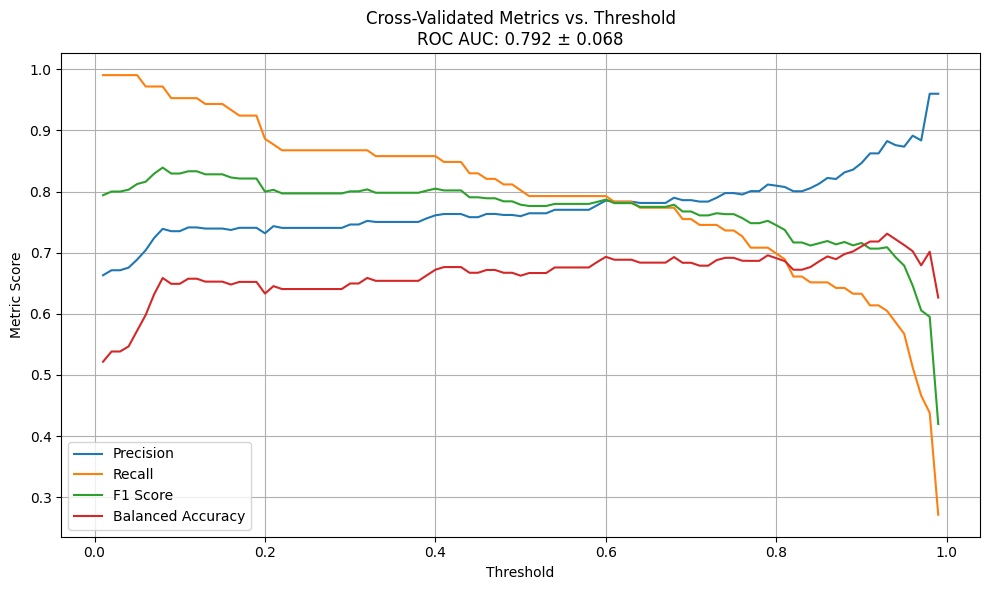

In [81]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    balanced_accuracy_score, roc_auc_score
)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Data ---
data = loop7_data
data_cols = [col for col in data.columns if 'COEFFICIENTS' not in col]
target_col = 'COEFFICIENTS'
X = data[data_cols].values
y = data[target_col].values.ravel()

# --- Thresholds ---
thresholds = np.linspace(0.01, 0.99, 99)
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1s = np.zeros_like(thresholds)
balanced_accuracies = np.zeros_like(thresholds)

# --- Track ROC AUC per fold
roc_aucs = []

# --- Stratified K-Fold CV ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # --- Scaling (fit on train only, transform both train/test) ---
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # --- Model training ---
    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)

    y_scores = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_scores)
    roc_aucs.append(auc)
    print(f"Fold {fold+1} ROC AUC: {auc:.3f}")

    for i, t in enumerate(thresholds):
        y_pred = (y_scores >= t).astype(int)
        precisions[i] += precision_score(y_test, y_pred, zero_division=0)
        recalls[i] += recall_score(y_test, y_pred)
        f1s[i] += f1_score(y_test, y_pred)
        balanced_accuracies[i] += balanced_accuracy_score(y_test, y_pred)

# --- Average metrics across folds ---
n_folds = kf.get_n_splits()
precisions /= n_folds
recalls /= n_folds
f1s /= n_folds
balanced_accuracies /= n_folds

# --- Report AUC ---
mean_auc = np.mean(roc_aucs)
std_auc = np.std(roc_aucs)
print(f"\nAverage ROC AUC: {mean_auc:.3f} ± {std_auc:.3f}")

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.title(f"Cross-Validated Metrics vs. Threshold\nROC AUC: {mean_auc:.3f} ± {std_auc:.3f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fold 1 ROC AUC: 0.859
Fold 2 ROC AUC: 0.865
Fold 3 ROC AUC: 0.882
Fold 4 ROC AUC: 0.879
Fold 5 ROC AUC: 0.869

Average ROC AUC: 0.871 ± 0.009


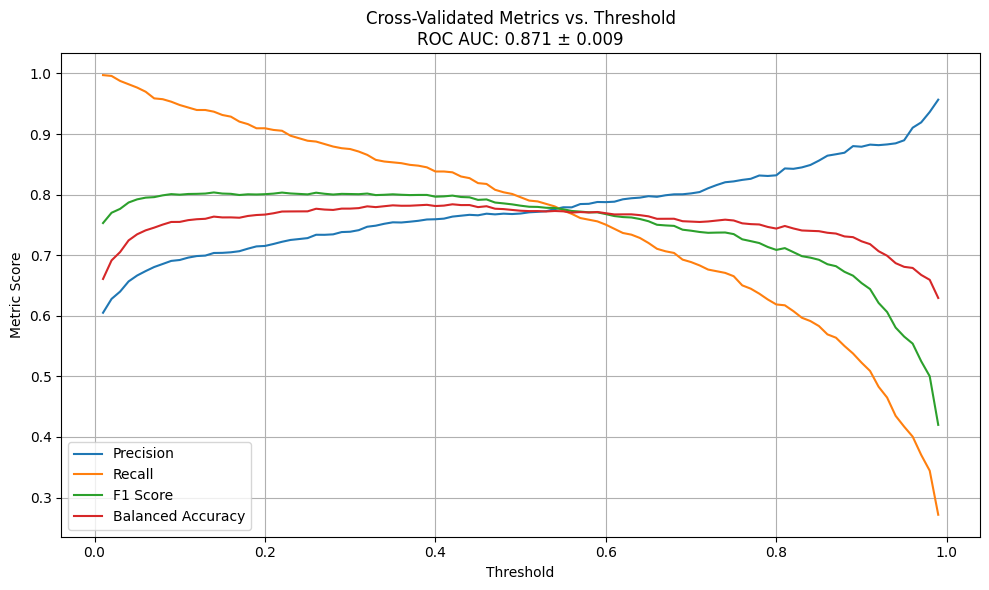

In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    balanced_accuracy_score, roc_auc_score
)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Data ---
data = loop8_data
data_cols = [col for col in data.columns if 'COEFFICIENTS' not in col]
target_col = 'COEFFICIENTS'
X = data[data_cols].values
y = data[target_col].values.ravel()

# --- Thresholds ---
thresholds = np.linspace(0.01, 0.99, 99)
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1s = np.zeros_like(thresholds)
balanced_accuracies = np.zeros_like(thresholds)

# --- Track ROC AUC per fold
roc_aucs = []

# --- Stratified K-Fold CV ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # --- Scaling (fit on train only, transform both train/test) ---
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # --- Model training ---
    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)

    y_scores = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_scores)
    roc_aucs.append(auc)
    print(f"Fold {fold+1} ROC AUC: {auc:.3f}")

    for i, t in enumerate(thresholds):
        y_pred = (y_scores >= t).astype(int)
        precisions[i] += precision_score(y_test, y_pred, zero_division=0)
        recalls[i] += recall_score(y_test, y_pred)
        f1s[i] += f1_score(y_test, y_pred)
        balanced_accuracies[i] += balanced_accuracy_score(y_test, y_pred)

# --- Average metrics across folds ---
n_folds = kf.get_n_splits()
precisions /= n_folds
recalls /= n_folds
f1s /= n_folds
balanced_accuracies /= n_folds

# --- Report AUC ---
mean_auc = np.mean(roc_aucs)
std_auc = np.std(roc_aucs)
print(f"\nAverage ROC AUC: {mean_auc:.3f} ± {std_auc:.3f}")

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.title(f"Cross-Validated Metrics vs. Threshold\nROC AUC: {mean_auc:.3f} ± {std_auc:.3f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fold 1 ROC AUC: 0.904
Fold 2 ROC AUC: 0.893
Fold 3 ROC AUC: 0.900
Fold 4 ROC AUC: 0.904
Fold 5 ROC AUC: 0.904

Average ROC AUC: 0.901 ± 0.004


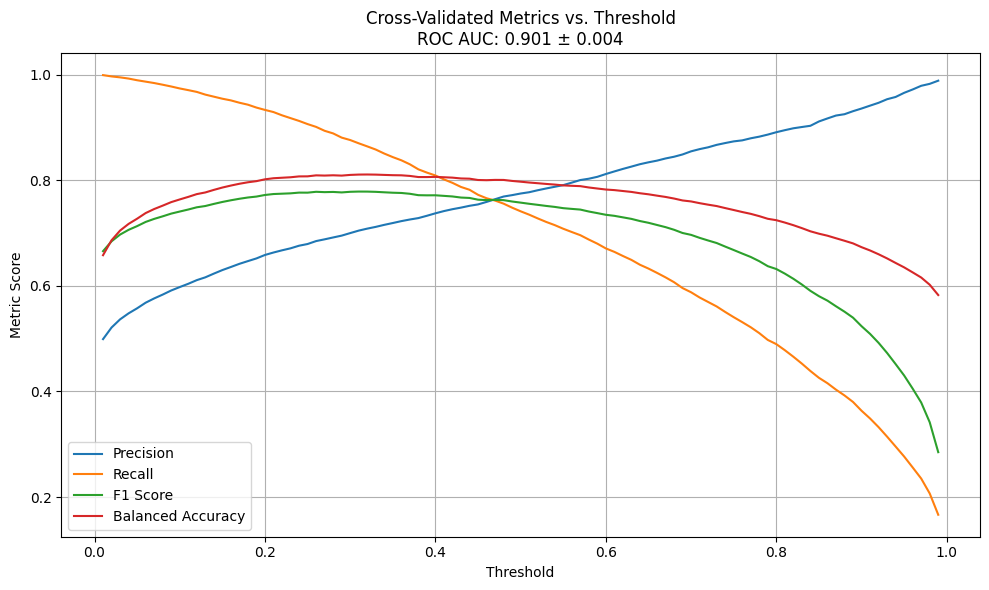

In [84]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    balanced_accuracy_score, roc_auc_score
)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Data ---
data = loop9_data
data_cols = [col for col in data.columns if 'COEFFICIENTS' not in col]
target_col = 'COEFFICIENTS'
X = data[data_cols].values
y = data[target_col].values.ravel()

# --- Thresholds ---
thresholds = np.linspace(0.01, 0.99, 99)
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1s = np.zeros_like(thresholds)
balanced_accuracies = np.zeros_like(thresholds)

# --- Track ROC AUC per fold
roc_aucs = []

# --- Stratified K-Fold CV ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # --- Scaling (fit on train only, transform both train/test) ---
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # --- Model training ---
    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)

    y_scores = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_scores)
    roc_aucs.append(auc)
    print(f"Fold {fold+1} ROC AUC: {auc:.3f}")

    for i, t in enumerate(thresholds):
        y_pred = (y_scores >= t).astype(int)
        precisions[i] += precision_score(y_test, y_pred, zero_division=0)
        recalls[i] += recall_score(y_test, y_pred)
        f1s[i] += f1_score(y_test, y_pred)
        balanced_accuracies[i] += balanced_accuracy_score(y_test, y_pred)

# --- Average metrics across folds ---
n_folds = kf.get_n_splits()
precisions /= n_folds
recalls /= n_folds
f1s /= n_folds
balanced_accuracies /= n_folds

# --- Report AUC ---
mean_auc = np.mean(roc_aucs)
std_auc = np.std(roc_aucs)
print(f"\nAverage ROC AUC: {mean_auc:.3f} ± {std_auc:.3f}")

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.title(f"Cross-Validated Metrics vs. Threshold\nROC AUC: {mean_auc:.3f} ± {std_auc:.3f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fold 1 ROC AUC: 0.914
Fold 2 ROC AUC: 0.916
Fold 3 ROC AUC: 0.914
Fold 4 ROC AUC: 0.916
Fold 5 ROC AUC: 0.918

Average ROC AUC: 0.916 ± 0.001


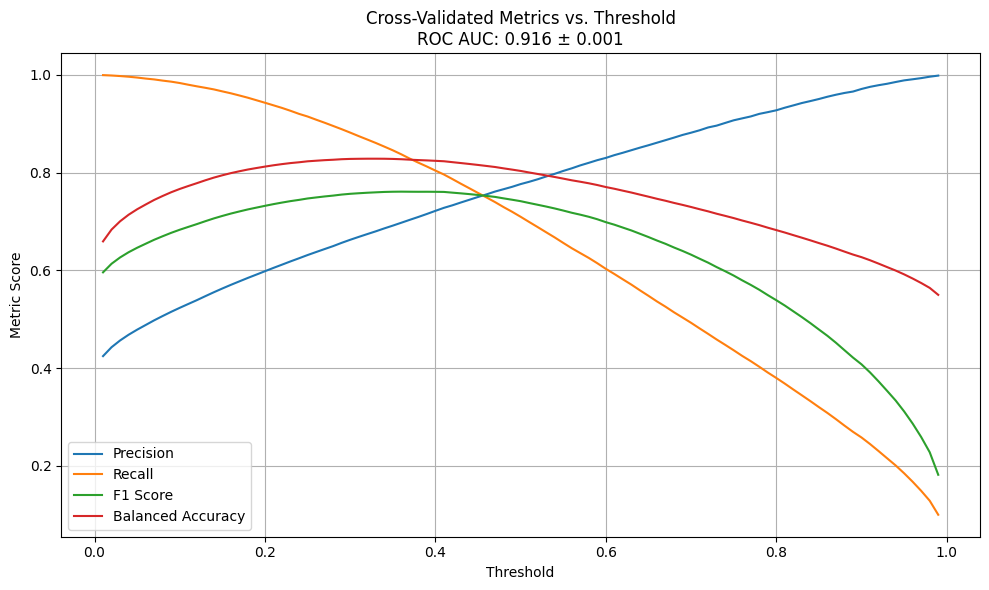

In [85]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    balanced_accuracy_score, roc_auc_score
)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Data ---
data = loop10_data
data_cols = [col for col in data.columns if 'COEFFICIENTS' not in col]
target_col = 'COEFFICIENTS'
X = data[data_cols].values
y = data[target_col].values.ravel()

# --- Thresholds ---
thresholds = np.linspace(0.01, 0.99, 99)
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1s = np.zeros_like(thresholds)
balanced_accuracies = np.zeros_like(thresholds)

# --- Track ROC AUC per fold
roc_aucs = []

# --- Stratified K-Fold CV ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # --- Scaling (fit on train only, transform both train/test) ---
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # --- Model training ---
    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)

    y_scores = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_scores)
    roc_aucs.append(auc)
    print(f"Fold {fold+1} ROC AUC: {auc:.3f}")

    for i, t in enumerate(thresholds):
        y_pred = (y_scores >= t).astype(int)
        precisions[i] += precision_score(y_test, y_pred, zero_division=0)
        recalls[i] += recall_score(y_test, y_pred)
        f1s[i] += f1_score(y_test, y_pred)
        balanced_accuracies[i] += balanced_accuracy_score(y_test, y_pred)

# --- Average metrics across folds ---
n_folds = kf.get_n_splits()
precisions /= n_folds
recalls /= n_folds
f1s /= n_folds
balanced_accuracies /= n_folds

# --- Report AUC ---
mean_auc = np.mean(roc_aucs)
std_auc = np.std(roc_aucs)
print(f"\nAverage ROC AUC: {mean_auc:.3f} ± {std_auc:.3f}")

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.title(f"Cross-Validated Metrics vs. Threshold\nROC AUC: {mean_auc:.3f} ± {std_auc:.3f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [86]:
#pairwise stratifications

loop7_data['loops'] = 7
loop8_data['loops'] = 8
loop9_data['loops'] = 9
loop10_data['loops'] = 10

In [87]:
all_loops = pd.concat([loop7_data, loop8_data, loop9_data,loop10_data], axis = 0)

Fold 1 ROC AUC (loop 7): 0.884
Fold 1 ROC AUC (loop 8): 0.847
Fold 2 ROC AUC (loop 7): 0.888
Fold 2 ROC AUC (loop 8): 0.884
Fold 3 ROC AUC (loop 7): 0.810
Fold 3 ROC AUC (loop 8): 0.864
Fold 4 ROC AUC (loop 7): 0.873
Fold 4 ROC AUC (loop 8): 0.874
Fold 5 ROC AUC (loop 7): 0.814
Fold 5 ROC AUC (loop 8): 0.839

Average ROC AUC for loop 7: 0.854 ± 0.035
Average ROC AUC for loop 8: 0.862 ± 0.017


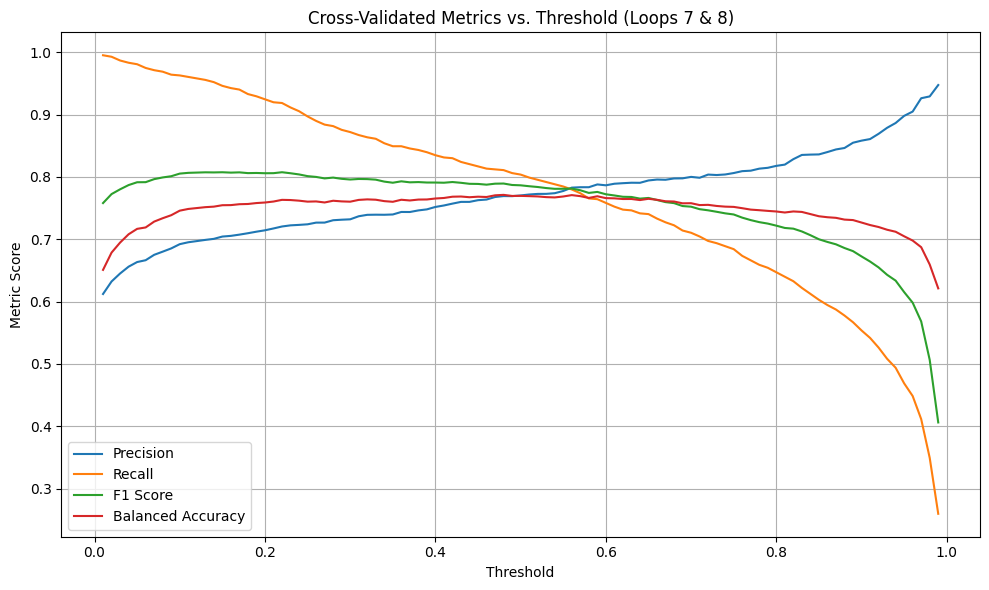

In [88]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Filter data: train/test only on loops 7 & 8 ---
data = all_loops[all_loops['loops'].isin([7, 8])]

# --- Setup ---
data_cols = [col for col in data.columns if 'COEFFICIENTS' not in col]
target_col = 'COEFFICIENTS'
stratify_labels = data[target_col].astype(str) + "_" + data["loops"].astype(str)

X = data[data_cols].values
y = data[target_col].values.ravel()
loops = data["loops"].values  # to track per-test-loop performance

# --- Thresholds for precision/recall curves ---
thresholds = np.linspace(0.01, 0.99, 99)
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1s = np.zeros_like(thresholds)
balanced_accuracies = np.zeros_like(thresholds)

# --- Store ROC AUC per loop, per fold ---
loop7_aucs = []
loop8_aucs = []

# --- Cross-validation ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X, stratify_labels)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    loop_test = loops[test_idx]

    # Optional: scaling
    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]

    # --- AUCs per loop value ---
    for loop_id, auc_list in [(7, loop7_aucs), (8, loop8_aucs)]:
        mask = loop_test == loop_id
        if mask.sum() > 0:
            auc = roc_auc_score(y_test[mask], y_scores[mask])
            auc_list.append(auc)
            print(f"Fold {fold+1} ROC AUC (loop {loop_id}): {auc:.3f}")
        else:
            print(f"Fold {fold+1} has no samples for loop {loop_id}")

    # --- Threshold-dependent metrics ---
    for i, t in enumerate(thresholds):
        y_pred = (y_scores >= t).astype(int)
        precisions[i] += precision_score(y_test, y_pred, zero_division=0)
        recalls[i] += recall_score(y_test, y_pred)
        f1s[i] += f1_score(y_test, y_pred)
        balanced_accuracies[i] += balanced_accuracy_score(y_test, y_pred)

# --- Average threshold metrics ---
n_folds = kf.get_n_splits()
precisions /= n_folds
recalls /= n_folds
f1s /= n_folds
balanced_accuracies /= n_folds

# --- Report average AUCs ---
print(f"\nAverage ROC AUC for loop 7: {np.mean(loop7_aucs):.3f} ± {np.std(loop7_aucs):.3f}")
print(f"Average ROC AUC for loop 8: {np.mean(loop8_aucs):.3f} ± {np.std(loop8_aucs):.3f}")

# --- Plot metrics vs threshold ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.title("Cross-Validated Metrics vs. Threshold (Loops 7 & 8)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fold 1 ROC AUC (loop 8): 0.868
Fold 1 ROC AUC (loop 9): 0.899
Fold 2 ROC AUC (loop 8): 0.887
Fold 2 ROC AUC (loop 9): 0.894
Fold 3 ROC AUC (loop 8): 0.883
Fold 3 ROC AUC (loop 9): 0.906
Fold 4 ROC AUC (loop 8): 0.882
Fold 4 ROC AUC (loop 9): 0.898
Fold 5 ROC AUC (loop 8): 0.876
Fold 5 ROC AUC (loop 9): 0.909

Average ROC AUC for loop 8: 0.879 ± 0.007
Average ROC AUC for loop 9: 0.901 ± 0.006


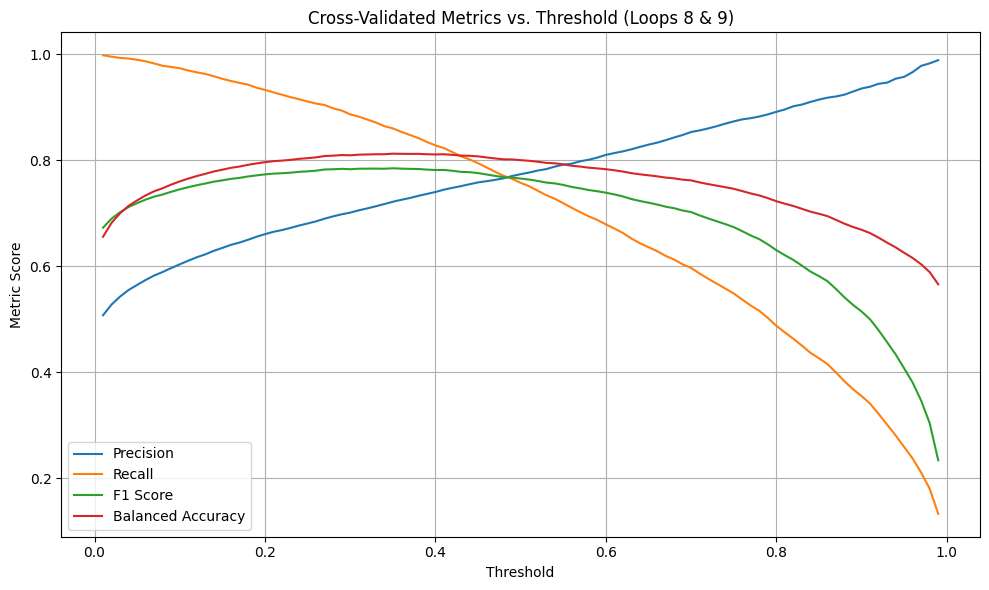

In [89]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Filter data: train/test only on loops 7 & 8 ---
data = all_loops[all_loops['loops'].isin([8,9])]

# --- Setup ---
data_cols = [col for col in data.columns if 'COEFFICIENTS' not in col]
target_col = 'COEFFICIENTS'
stratify_labels = data[target_col].astype(str) + "_" + data["loops"].astype(str)

X = data[data_cols].values
y = data[target_col].values.ravel()
loops = data["loops"].values  # to track per-test-loop performance

# --- Thresholds for precision/recall curves ---
thresholds = np.linspace(0.01, 0.99, 99)
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1s = np.zeros_like(thresholds)
balanced_accuracies = np.zeros_like(thresholds)

# --- Store ROC AUC per loop, per fold ---
loop8_aucs = []
loop9_aucs = []

# --- Cross-validation ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X, stratify_labels)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    loop_test = loops[test_idx]

    # Optional: scaling
    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]

    # --- AUCs per loop value ---
    for loop_id, auc_list in [(8, loop8_aucs), (9, loop9_aucs)]:
        mask = loop_test == loop_id
        if mask.sum() > 0:
            auc = roc_auc_score(y_test[mask], y_scores[mask])
            auc_list.append(auc)
            print(f"Fold {fold+1} ROC AUC (loop {loop_id}): {auc:.3f}")
        else:
            print(f"Fold {fold+1} has no samples for loop {loop_id}")

    # --- Threshold-dependent metrics ---
    for i, t in enumerate(thresholds):
        y_pred = (y_scores >= t).astype(int)
        precisions[i] += precision_score(y_test, y_pred, zero_division=0)
        recalls[i] += recall_score(y_test, y_pred)
        f1s[i] += f1_score(y_test, y_pred)
        balanced_accuracies[i] += balanced_accuracy_score(y_test, y_pred)

# --- Average threshold metrics ---
n_folds = kf.get_n_splits()
precisions /= n_folds
recalls /= n_folds
f1s /= n_folds
balanced_accuracies /= n_folds

# --- Report average AUCs ---
print(f"\nAverage ROC AUC for loop 8: {np.mean(loop8_aucs):.3f} ± {np.std(loop8_aucs):.3f}")
print(f"Average ROC AUC for loop 9: {np.mean(loop9_aucs):.3f} ± {np.std(loop9_aucs):.3f}")

# --- Plot metrics vs threshold ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.title("Cross-Validated Metrics vs. Threshold (Loops 8 & 9)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fold 1 ROC AUC (loop 9): 0.902
Fold 1 ROC AUC (loop 10): 0.916
Fold 2 ROC AUC (loop 9): 0.895
Fold 2 ROC AUC (loop 10): 0.914
Fold 3 ROC AUC (loop 9): 0.896
Fold 3 ROC AUC (loop 10): 0.913
Fold 4 ROC AUC (loop 9): 0.912
Fold 4 ROC AUC (loop 10): 0.914
Fold 5 ROC AUC (loop 9): 0.905
Fold 5 ROC AUC (loop 10): 0.916

Average ROC AUC for loop 9: 0.902 ± 0.006
Average ROC AUC for loop 10: 0.914 ± 0.001


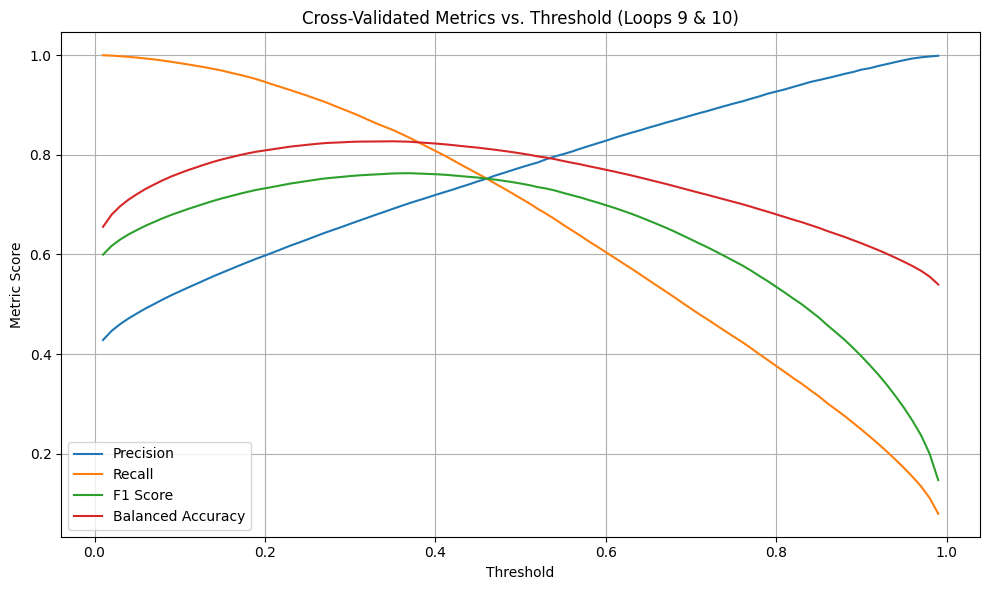

In [92]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Filter data: train/test only on loops 7 & 8 ---
data = all_loops[all_loops['loops'].isin([9,10])]

# --- Setup ---
data_cols = [col for col in data.columns if 'COEFFICIENTS' not in col]
target_col = 'COEFFICIENTS'
stratify_labels = data[target_col].astype(str) + "_" + data["loops"].astype(str)

X = data[data_cols].values
y = data[target_col].values.ravel()
loops = data["loops"].values  # to track per-test-loop performance

# --- Thresholds for precision/recall curves ---
thresholds = np.linspace(0.01, 0.99, 99)
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1s = np.zeros_like(thresholds)
balanced_accuracies = np.zeros_like(thresholds)

# --- Store ROC AUC per loop, per fold ---
loop8_aucs = []
loop9_aucs = []

# --- Cross-validation ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X, stratify_labels)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    loop_test = loops[test_idx]

    # Optional: scaling
    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]

    # --- AUCs per loop value ---
    for loop_id, auc_list in [(9, loop8_aucs), (10, loop9_aucs)]:
        mask = loop_test == loop_id
        if mask.sum() > 0:
            auc = roc_auc_score(y_test[mask], y_scores[mask])
            auc_list.append(auc)
            print(f"Fold {fold+1} ROC AUC (loop {loop_id}): {auc:.3f}")
        else:
            print(f"Fold {fold+1} has no samples for loop {loop_id}")

    # --- Threshold-dependent metrics ---
    for i, t in enumerate(thresholds):
        y_pred = (y_scores >= t).astype(int)
        precisions[i] += precision_score(y_test, y_pred, zero_division=0)
        recalls[i] += recall_score(y_test, y_pred)
        f1s[i] += f1_score(y_test, y_pred)
        balanced_accuracies[i] += balanced_accuracy_score(y_test, y_pred)

# --- Average threshold metrics ---
n_folds = kf.get_n_splits()
precisions /= n_folds
recalls /= n_folds
f1s /= n_folds
balanced_accuracies /= n_folds

# --- Report average AUCs ---
print(f"\nAverage ROC AUC for loop 9: {np.mean(loop8_aucs):.3f} ± {np.std(loop8_aucs):.3f}")
print(f"Average ROC AUC for loop 10: {np.mean(loop9_aucs):.3f} ± {np.std(loop9_aucs):.3f}")

# --- Plot metrics vs threshold ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.title("Cross-Validated Metrics vs. Threshold (Loops 9 & 10)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [93]:
# directionality

Fold 1 AUC (train folds on loops [7]): 0.789
Fold 1 AUC (loop 8): 0.758
Fold 1 AUC (loop 9): 0.765
Fold 1 AUC (loop 10): 0.704
Fold 2 AUC (train folds on loops [7]): 0.847
Fold 2 AUC (loop 8): 0.752
Fold 2 AUC (loop 9): 0.740
Fold 2 AUC (loop 10): 0.704
Fold 3 AUC (train folds on loops [7]): 0.817
Fold 3 AUC (loop 8): 0.753
Fold 3 AUC (loop 9): 0.684
Fold 3 AUC (loop 10): 0.595
Fold 4 AUC (train folds on loops [7]): 0.845
Fold 4 AUC (loop 8): 0.754
Fold 4 AUC (loop 9): 0.748
Fold 4 AUC (loop 10): 0.704
Fold 5 AUC (train folds on loops [7]): 0.662
Fold 5 AUC (loop 8): 0.750
Fold 5 AUC (loop 9): 0.680
Fold 5 AUC (loop 10): 0.605

Average ROC AUC on training fold (loops [7]): 0.792 ± 0.068
Average ROC AUC on loop 8: 0.753 ± 0.003
Average ROC AUC on loop 9: 0.724 ± 0.035
Average ROC AUC on loop 10: 0.662 ± 0.051


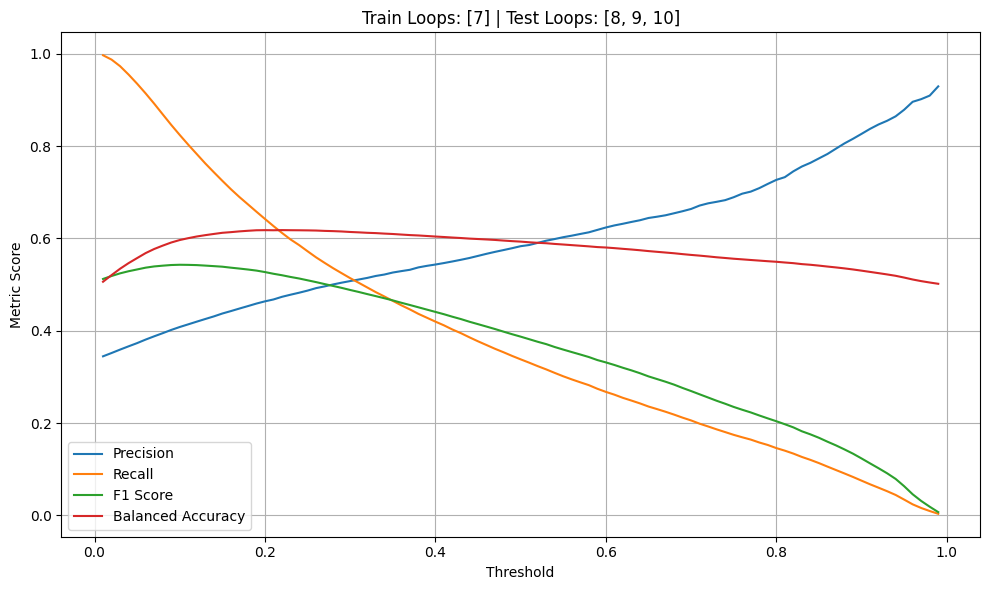

In [95]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Define loops to use ---
train_loops = [7]
test_loops = [8, 9, 10]

# --- Split data ---
train_data = all_loops[all_loops['loops'].isin(train_loops)]
test_data = all_loops[all_loops['loops'].isin(test_loops)]

# --- Columns ---
data_cols = [col for col in data.columns if 'COEFFICIENTS' not in col]
target_col = 'COEFFICIENTS'

# --- Train data ---
X_train_full = train_data[data_cols].values
y_train_full = train_data[target_col].values.ravel()

# --- Test data ---
X_test = test_data[data_cols].values
y_test = test_data[target_col].values.ravel()
loop_test = test_data['loops'].values

# --- Thresholds for metric curves ---
thresholds = np.linspace(0.01, 0.99, 99)
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1s = np.zeros_like(thresholds)
balanced_accuracies = np.zeros_like(thresholds)

# --- AUC trackers ---
train_val_aucs = []  # loop(s) used for training cross-val
test_loop_aucs = {loop: [] for loop in test_loops}  # aucs for each test loop

# --- Stratified K-Fold CV ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full)):
    X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
    y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)

    # --- AUC on validation set (from train loop group) ---
    val_scores = model.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, val_scores)
    train_val_aucs.append(val_auc)
    print(f"Fold {fold+1} AUC (train folds on loops {train_loops}): {val_auc:.3f}")

    # --- AUC on each test loop
    test_scores = model.predict_proba(X_test)[:, 1]
    for loop_id in test_loops:
        mask = loop_test == loop_id
        if mask.sum() > 0:
            auc = roc_auc_score(y_test[mask], test_scores[mask])
            test_loop_aucs[loop_id].append(auc)
            print(f"Fold {fold+1} AUC (loop {loop_id}): {auc:.3f}")
        else:
            print(f"Fold {fold+1} has no samples for loop {loop_id}")

    # --- Threshold metrics (on all test loops combined) ---
    for i, t in enumerate(thresholds):
        y_pred = (test_scores >= t).astype(int)
        precisions[i] += precision_score(y_test, y_pred, zero_division=0)
        recalls[i] += recall_score(y_test, y_pred)
        f1s[i] += f1_score(y_test, y_pred)
        balanced_accuracies[i] += balanced_accuracy_score(y_test, y_pred)

# --- Average metrics ---
n_folds = kf.get_n_splits()
precisions /= n_folds
recalls /= n_folds
f1s /= n_folds
balanced_accuracies /= n_folds

# --- Print AUC summaries ---
print(f"\nAverage ROC AUC on training fold (loops {train_loops}): {np.mean(train_val_aucs):.3f} ± {np.std(train_val_aucs):.3f}")
for loop_id in test_loops:
    aucs = test_loop_aucs[loop_id]
    print(f"Average ROC AUC on loop {loop_id}: {np.mean(aucs):.3f} ± {np.std(aucs):.3f}")

# --- Plot metrics vs threshold ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.title(f"Train Loops: {train_loops} | Test Loops: {test_loops}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fold 1 AUC (train folds on loops [7, 8]): 0.858
Fold 1 AUC (loop 9): 0.780
Fold 1 AUC (loop 10): 0.783
Fold 2 AUC (train folds on loops [7, 8]): 0.856
Fold 2 AUC (loop 9): 0.797
Fold 2 AUC (loop 10): 0.773
Fold 3 AUC (train folds on loops [7, 8]): 0.848
Fold 3 AUC (loop 9): 0.788
Fold 3 AUC (loop 10): 0.778
Fold 4 AUC (train folds on loops [7, 8]): 0.861
Fold 4 AUC (loop 9): 0.784
Fold 4 AUC (loop 10): 0.782
Fold 5 AUC (train folds on loops [7, 8]): 0.899
Fold 5 AUC (loop 9): 0.782
Fold 5 AUC (loop 10): 0.761

Average ROC AUC on training fold (loops [7, 8]): 0.864 ± 0.018
Average ROC AUC on loop 9: 0.786 ± 0.006
Average ROC AUC on loop 10: 0.775 ± 0.008


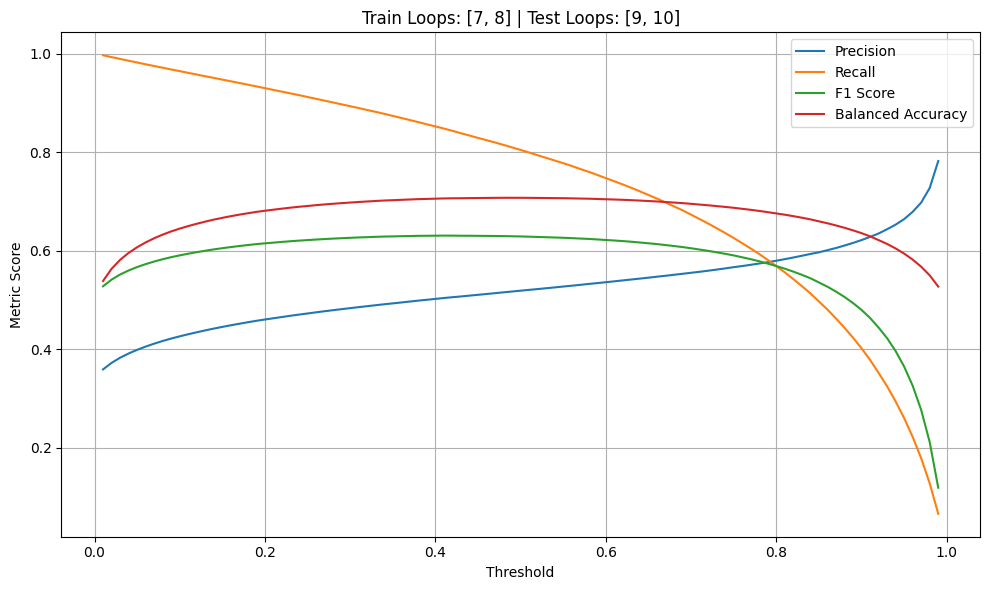

In [96]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Define loops to use ---
train_loops = [7,8]
test_loops = [9, 10]

# --- Split data ---
train_data = all_loops[all_loops['loops'].isin(train_loops)]
test_data = all_loops[all_loops['loops'].isin(test_loops)]

# --- Columns ---
data_cols = [col for col in data.columns if 'COEFFICIENTS' not in col]
target_col = 'COEFFICIENTS'

# --- Train data ---
X_train_full = train_data[data_cols].values
y_train_full = train_data[target_col].values.ravel()

# --- Test data ---
X_test = test_data[data_cols].values
y_test = test_data[target_col].values.ravel()
loop_test = test_data['loops'].values

# --- Thresholds for metric curves ---
thresholds = np.linspace(0.01, 0.99, 99)
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1s = np.zeros_like(thresholds)
balanced_accuracies = np.zeros_like(thresholds)

# --- AUC trackers ---
train_val_aucs = []  # loop(s) used for training cross-val
test_loop_aucs = {loop: [] for loop in test_loops}  # aucs for each test loop

# --- Stratified K-Fold CV ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full)):
    X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
    y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)

    # --- AUC on validation set (from train loop group) ---
    val_scores = model.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, val_scores)
    train_val_aucs.append(val_auc)
    print(f"Fold {fold+1} AUC (train folds on loops {train_loops}): {val_auc:.3f}")

    # --- AUC on each test loop
    test_scores = model.predict_proba(X_test)[:, 1]
    for loop_id in test_loops:
        mask = loop_test == loop_id
        if mask.sum() > 0:
            auc = roc_auc_score(y_test[mask], test_scores[mask])
            test_loop_aucs[loop_id].append(auc)
            print(f"Fold {fold+1} AUC (loop {loop_id}): {auc:.3f}")
        else:
            print(f"Fold {fold+1} has no samples for loop {loop_id}")

    # --- Threshold metrics (on all test loops combined) ---
    for i, t in enumerate(thresholds):
        y_pred = (test_scores >= t).astype(int)
        precisions[i] += precision_score(y_test, y_pred, zero_division=0)
        recalls[i] += recall_score(y_test, y_pred)
        f1s[i] += f1_score(y_test, y_pred)
        balanced_accuracies[i] += balanced_accuracy_score(y_test, y_pred)

# --- Average metrics ---
n_folds = kf.get_n_splits()
precisions /= n_folds
recalls /= n_folds
f1s /= n_folds
balanced_accuracies /= n_folds

# --- Print AUC summaries ---
print(f"\nAverage ROC AUC on training fold (loops {train_loops}): {np.mean(train_val_aucs):.3f} ± {np.std(train_val_aucs):.3f}")
for loop_id in test_loops:
    aucs = test_loop_aucs[loop_id]
    print(f"Average ROC AUC on loop {loop_id}: {np.mean(aucs):.3f} ± {np.std(aucs):.3f}")

# --- Plot metrics vs threshold ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.title(f"Train Loops: {train_loops} | Test Loops: {test_loops}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fold 1 AUC (train folds on loops [7, 8, 9]): 0.898
Fold 1 AUC (loop 10): 0.806
Fold 2 AUC (train folds on loops [7, 8, 9]): 0.892
Fold 2 AUC (loop 10): 0.809
Fold 3 AUC (train folds on loops [7, 8, 9]): 0.902
Fold 3 AUC (loop 10): 0.816
Fold 4 AUC (train folds on loops [7, 8, 9]): 0.899
Fold 4 AUC (loop 10): 0.820
Fold 5 AUC (train folds on loops [7, 8, 9]): 0.900
Fold 5 AUC (loop 10): 0.818

Average ROC AUC on training fold (loops [7, 8, 9]): 0.898 ± 0.003
Average ROC AUC on loop 10: 0.814 ± 0.005


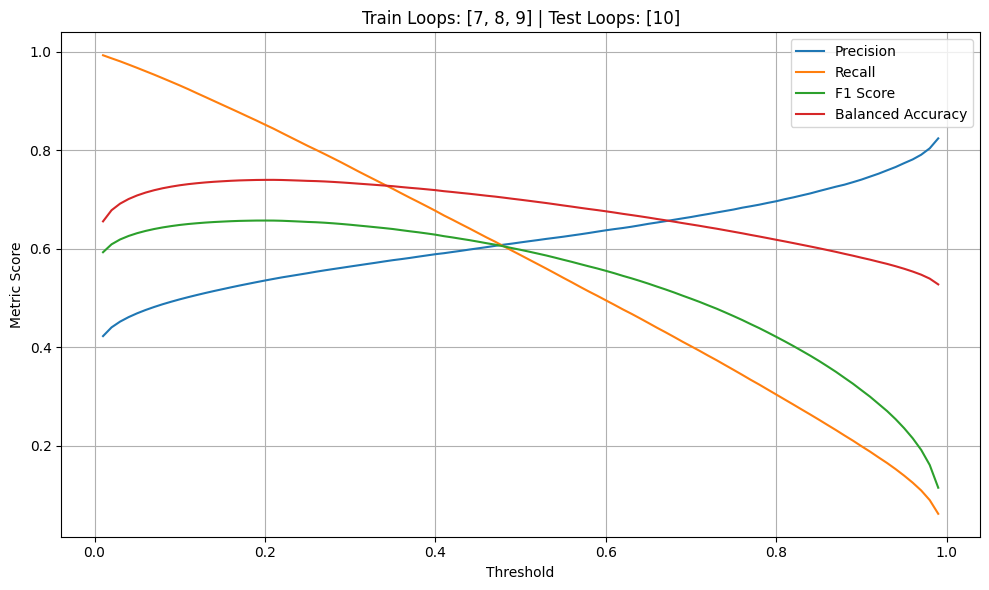

In [97]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Define loops to use ---
train_loops = [7,8 , 9]
test_loops = [10]

# --- Split data ---
train_data = all_loops[all_loops['loops'].isin(train_loops)]
test_data = all_loops[all_loops['loops'].isin(test_loops)]

# --- Columns ---
data_cols = [col for col in data.columns if 'COEFFICIENTS' not in col]
target_col = 'COEFFICIENTS'

# --- Train data ---
X_train_full = train_data[data_cols].values
y_train_full = train_data[target_col].values.ravel()

# --- Test data ---
X_test = test_data[data_cols].values
y_test = test_data[target_col].values.ravel()
loop_test = test_data['loops'].values

# --- Thresholds for metric curves ---
thresholds = np.linspace(0.01, 0.99, 99)
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1s = np.zeros_like(thresholds)
balanced_accuracies = np.zeros_like(thresholds)

# --- AUC trackers ---
train_val_aucs = []  # loop(s) used for training cross-val
test_loop_aucs = {loop: [] for loop in test_loops}  # aucs for each test loop

# --- Stratified K-Fold CV ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full)):
    X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
    y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)

    # --- AUC on validation set (from train loop group) ---
    val_scores = model.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, val_scores)
    train_val_aucs.append(val_auc)
    print(f"Fold {fold+1} AUC (train folds on loops {train_loops}): {val_auc:.3f}")

    # --- AUC on each test loop
    test_scores = model.predict_proba(X_test)[:, 1]
    for loop_id in test_loops:
        mask = loop_test == loop_id
        if mask.sum() > 0:
            auc = roc_auc_score(y_test[mask], test_scores[mask])
            test_loop_aucs[loop_id].append(auc)
            print(f"Fold {fold+1} AUC (loop {loop_id}): {auc:.3f}")
        else:
            print(f"Fold {fold+1} has no samples for loop {loop_id}")

    # --- Threshold metrics (on all test loops combined) ---
    for i, t in enumerate(thresholds):
        y_pred = (test_scores >= t).astype(int)
        precisions[i] += precision_score(y_test, y_pred, zero_division=0)
        recalls[i] += recall_score(y_test, y_pred)
        f1s[i] += f1_score(y_test, y_pred)
        balanced_accuracies[i] += balanced_accuracy_score(y_test, y_pred)

# --- Average metrics ---
n_folds = kf.get_n_splits()
precisions /= n_folds
recalls /= n_folds
f1s /= n_folds
balanced_accuracies /= n_folds

# --- Print AUC summaries ---
print(f"\nAverage ROC AUC on training fold (loops {train_loops}): {np.mean(train_val_aucs):.3f} ± {np.std(train_val_aucs):.3f}")
for loop_id in test_loops:
    aucs = test_loop_aucs[loop_id]
    print(f"Average ROC AUC on loop {loop_id}: {np.mean(aucs):.3f} ± {np.std(aucs):.3f}")

# --- Plot metrics vs threshold ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.title(f"Train Loops: {train_loops} | Test Loops: {test_loops}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
##### STOP HERE

Fold 1 AUC (train folds on loops [7, 8]): 0.947
Fold 1 AUC (loop 9): 0.652
Fold 2 AUC (train folds on loops [7, 8]): 0.953
Fold 2 AUC (loop 9): 0.635
Fold 3 AUC (train folds on loops [7, 8]): 0.937
Fold 3 AUC (loop 9): 0.624
Fold 4 AUC (train folds on loops [7, 8]): 0.940
Fold 4 AUC (loop 9): 0.572
Fold 5 AUC (train folds on loops [7, 8]): 0.933
Fold 5 AUC (loop 9): 0.597

Average ROC AUC on training fold (loops [7, 8]): 0.942 ± 0.007
Average ROC AUC on loop 9: 0.616 ± 0.028


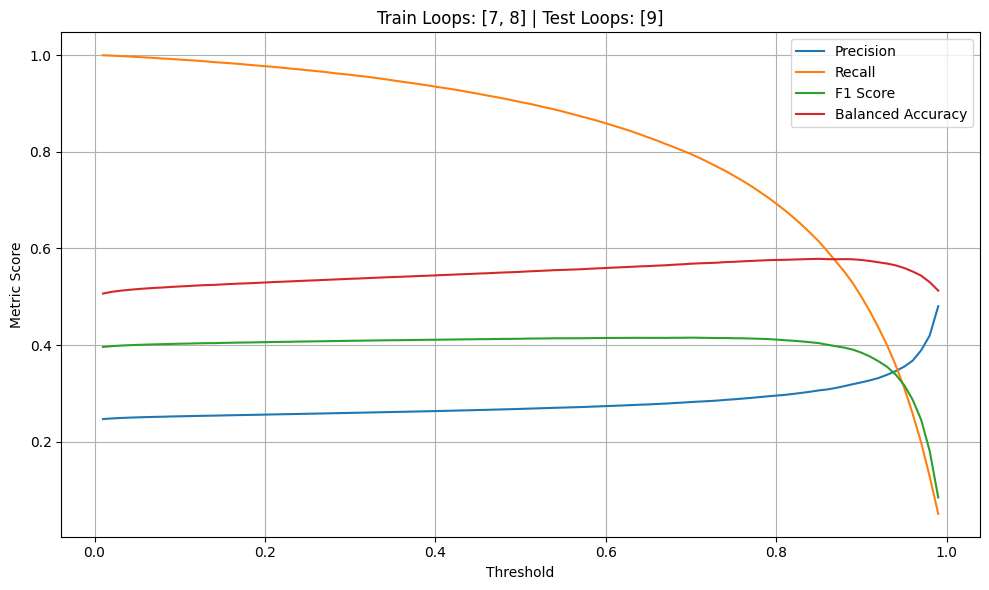

In [132]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Define loops to use ---
train_loops = [7, 8]
test_loops = [9]

# --- Split data ---
train_data = all_loops[all_loops['loops'].isin(train_loops)]
test_data = all_loops[all_loops['loops'].isin(test_loops)]

# --- Columns ---
data_cols = [col for col in all_loops.columns if 'EIGEN' in col]
target_col = 'COEFFICIENT_DEN'

# --- Train data ---
X_train_full = train_data[data_cols].values
y_train_full = train_data[target_col].values.ravel()

# --- Test data ---
X_test = test_data[data_cols].values
y_test = test_data[target_col].values.ravel()
loop_test = test_data['loops'].values

# --- Thresholds for metric curves ---
thresholds = np.linspace(0.01, 0.99, 99)
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1s = np.zeros_like(thresholds)
balanced_accuracies = np.zeros_like(thresholds)

# --- AUC trackers ---
train_val_aucs = []  # loop(s) used for training cross-val
test_loop_aucs = {loop: [] for loop in test_loops}  # aucs for each test loop

# --- Stratified K-Fold CV ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full)):
    X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
    y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)

    # --- AUC on validation set (from train loop group) ---
    val_scores = model.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, val_scores)
    train_val_aucs.append(val_auc)
    print(f"Fold {fold+1} AUC (train folds on loops {train_loops}): {val_auc:.3f}")

    # --- AUC on each test loop
    test_scores = model.predict_proba(X_test)[:, 1]
    for loop_id in test_loops:
        mask = loop_test == loop_id
        if mask.sum() > 0:
            auc = roc_auc_score(y_test[mask], test_scores[mask])
            test_loop_aucs[loop_id].append(auc)
            print(f"Fold {fold+1} AUC (loop {loop_id}): {auc:.3f}")
        else:
            print(f"Fold {fold+1} has no samples for loop {loop_id}")

    # --- Threshold metrics (on all test loops combined) ---
    for i, t in enumerate(thresholds):
        y_pred = (test_scores >= t).astype(int)
        precisions[i] += precision_score(y_test, y_pred, zero_division=0)
        recalls[i] += recall_score(y_test, y_pred)
        f1s[i] += f1_score(y_test, y_pred)
        balanced_accuracies[i] += balanced_accuracy_score(y_test, y_pred)

# --- Average metrics ---
n_folds = kf.get_n_splits()
precisions /= n_folds
recalls /= n_folds
f1s /= n_folds
balanced_accuracies /= n_folds

# --- Print AUC summaries ---
print(f"\nAverage ROC AUC on training fold (loops {train_loops}): {np.mean(train_val_aucs):.3f} ± {np.std(train_val_aucs):.3f}")
for loop_id in test_loops:
    aucs = test_loop_aucs[loop_id]
    print(f"Average ROC AUC on loop {loop_id}: {np.mean(aucs):.3f} ± {np.std(aucs):.3f}")

# --- Plot metrics vs threshold ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.title(f"Train Loops: {train_loops} | Test Loops: {test_loops}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fold 1 AUC (train folds on loops [9]): 0.953
Fold 1 AUC (loop 8): 0.742
Fold 1 AUC (loop 7): 0.659
Fold 2 AUC (train folds on loops [9]): 0.953
Fold 2 AUC (loop 8): 0.762
Fold 2 AUC (loop 7): 0.748
Fold 3 AUC (train folds on loops [9]): 0.947
Fold 3 AUC (loop 8): 0.763
Fold 3 AUC (loop 7): 0.706
Fold 4 AUC (train folds on loops [9]): 0.952
Fold 4 AUC (loop 8): 0.736
Fold 4 AUC (loop 7): 0.686
Fold 5 AUC (train folds on loops [9]): 0.949
Fold 5 AUC (loop 8): 0.742
Fold 5 AUC (loop 7): 0.673

Average ROC AUC on training fold (loops [9]): 0.951 ± 0.002
Average ROC AUC on loop 8: 0.749 ± 0.011
Average ROC AUC on loop 7: 0.694 ± 0.031


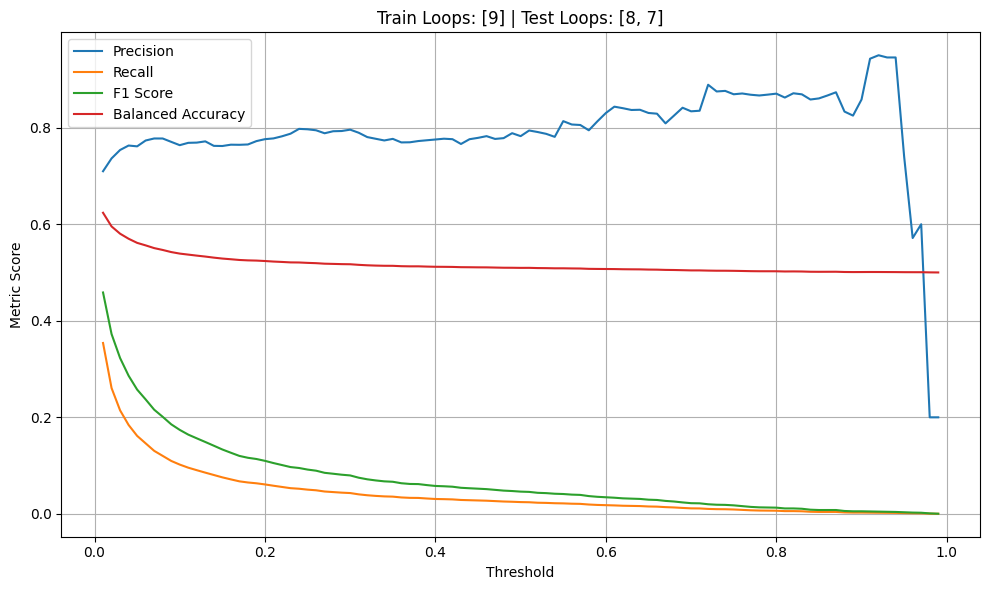

In [133]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Define loops to use ---
train_loops = [9]
test_loops = [8,7]

# --- Split data ---
train_data = all_loops[all_loops['loops'].isin(train_loops)]
test_data = all_loops[all_loops['loops'].isin(test_loops)]

# --- Columns ---
data_cols = [col for col in all_loops.columns if 'EIGEN' in col]
target_col = 'COEFFICIENT_DEN'

# --- Train data ---
X_train_full = train_data[data_cols].values
y_train_full = train_data[target_col].values.ravel()

# --- Test data ---
X_test = test_data[data_cols].values
y_test = test_data[target_col].values.ravel()
loop_test = test_data['loops'].values

# --- Thresholds for metric curves ---
thresholds = np.linspace(0.01, 0.99, 99)
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1s = np.zeros_like(thresholds)
balanced_accuracies = np.zeros_like(thresholds)

# --- AUC trackers ---
train_val_aucs = []  # loop(s) used for training cross-val
test_loop_aucs = {loop: [] for loop in test_loops}  # aucs for each test loop

# --- Stratified K-Fold CV ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full)):
    X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
    y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)

    # --- AUC on validation set (from train loop group) ---
    val_scores = model.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, val_scores)
    train_val_aucs.append(val_auc)
    print(f"Fold {fold+1} AUC (train folds on loops {train_loops}): {val_auc:.3f}")

    # --- AUC on each test loop
    test_scores = model.predict_proba(X_test)[:, 1]
    for loop_id in test_loops:
        mask = loop_test == loop_id
        if mask.sum() > 0:
            auc = roc_auc_score(y_test[mask], test_scores[mask])
            test_loop_aucs[loop_id].append(auc)
            print(f"Fold {fold+1} AUC (loop {loop_id}): {auc:.3f}")
        else:
            print(f"Fold {fold+1} has no samples for loop {loop_id}")

    # --- Threshold metrics (on all test loops combined) ---
    for i, t in enumerate(thresholds):
        y_pred = (test_scores >= t).astype(int)
        precisions[i] += precision_score(y_test, y_pred, zero_division=0)
        recalls[i] += recall_score(y_test, y_pred)
        f1s[i] += f1_score(y_test, y_pred)
        balanced_accuracies[i] += balanced_accuracy_score(y_test, y_pred)

# --- Average metrics ---
n_folds = kf.get_n_splits()
precisions /= n_folds
recalls /= n_folds
f1s /= n_folds
balanced_accuracies /= n_folds

# --- Print AUC summaries ---
print(f"\nAverage ROC AUC on training fold (loops {train_loops}): {np.mean(train_val_aucs):.3f} ± {np.std(train_val_aucs):.3f}")
for loop_id in test_loops:
    aucs = test_loop_aucs[loop_id]
    print(f"Average ROC AUC on loop {loop_id}: {np.mean(aucs):.3f} ± {np.std(aucs):.3f}")

# --- Plot metrics vs threshold ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.title(f"Train Loops: {train_loops} | Test Loops: {test_loops}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fold 1 AUC (train folds on loops [7, 8]): 0.947
Fold 1 AUC (loop 9): 0.652
Fold 2 AUC (train folds on loops [7, 8]): 0.953
Fold 2 AUC (loop 9): 0.635
Fold 3 AUC (train folds on loops [7, 8]): 0.937
Fold 3 AUC (loop 9): 0.624
Fold 4 AUC (train folds on loops [7, 8]): 0.940
Fold 4 AUC (loop 9): 0.572
Fold 5 AUC (train folds on loops [7, 8]): 0.933
Fold 5 AUC (loop 9): 0.597

Average ROC AUC on training fold (loops [7, 8]): 0.942 ± 0.007
Average ROC AUC on loop 9: 0.616 ± 0.028


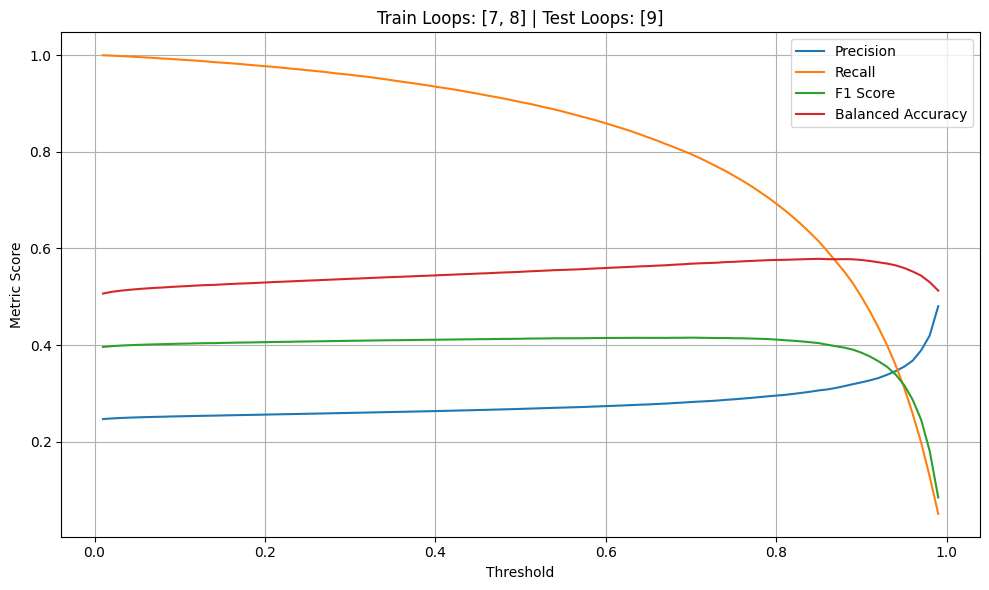

In [134]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Define loops to use ---
train_loops = [7,8]
test_loops = [9]

# --- Split data ---
train_data = all_loops[all_loops['loops'].isin(train_loops)]
test_data = all_loops[all_loops['loops'].isin(test_loops)]

# --- Columns ---
data_cols = [col for col in all_loops.columns if 'EIGEN' in col]
target_col = 'COEFFICIENT_DEN'

# --- Train data ---
X_train_full = train_data[data_cols].values
y_train_full = train_data[target_col].values.ravel()

# --- Test data ---
X_test = test_data[data_cols].values
y_test = test_data[target_col].values.ravel()
loop_test = test_data['loops'].values

# --- Thresholds for metric curves ---
thresholds = np.linspace(0.01, 0.99, 99)
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1s = np.zeros_like(thresholds)
balanced_accuracies = np.zeros_like(thresholds)

# --- AUC trackers ---
train_val_aucs = []  # loop(s) used for training cross-val
test_loop_aucs = {loop: [] for loop in test_loops}  # aucs for each test loop

# --- Stratified K-Fold CV ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full)):
    X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
    y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)

    # --- AUC on validation set (from train loop group) ---
    val_scores = model.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, val_scores)
    train_val_aucs.append(val_auc)
    print(f"Fold {fold+1} AUC (train folds on loops {train_loops}): {val_auc:.3f}")

    # --- AUC on each test loop
    test_scores = model.predict_proba(X_test)[:, 1]
    for loop_id in test_loops:
        mask = loop_test == loop_id
        if mask.sum() > 0:
            auc = roc_auc_score(y_test[mask], test_scores[mask])
            test_loop_aucs[loop_id].append(auc)
            print(f"Fold {fold+1} AUC (loop {loop_id}): {auc:.3f}")
        else:
            print(f"Fold {fold+1} has no samples for loop {loop_id}")

    # --- Threshold metrics (on all test loops combined) ---
    for i, t in enumerate(thresholds):
        y_pred = (test_scores >= t).astype(int)
        precisions[i] += precision_score(y_test, y_pred, zero_division=0)
        recalls[i] += recall_score(y_test, y_pred)
        f1s[i] += f1_score(y_test, y_pred)
        balanced_accuracies[i] += balanced_accuracy_score(y_test, y_pred)

# --- Average metrics ---
n_folds = kf.get_n_splits()
precisions /= n_folds
recalls /= n_folds
f1s /= n_folds
balanced_accuracies /= n_folds

# --- Print AUC summaries ---
print(f"\nAverage ROC AUC on training fold (loops {train_loops}): {np.mean(train_val_aucs):.3f} ± {np.std(train_val_aucs):.3f}")
for loop_id in test_loops:
    aucs = test_loop_aucs[loop_id]
    print(f"Average ROC AUC on loop {loop_id}: {np.mean(aucs):.3f} ± {np.std(aucs):.3f}")

# --- Plot metrics vs threshold ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.title(f"Train Loops: {train_loops} | Test Loops: {test_loops}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [137]:
# cluster the data and let's see what preditive power we get

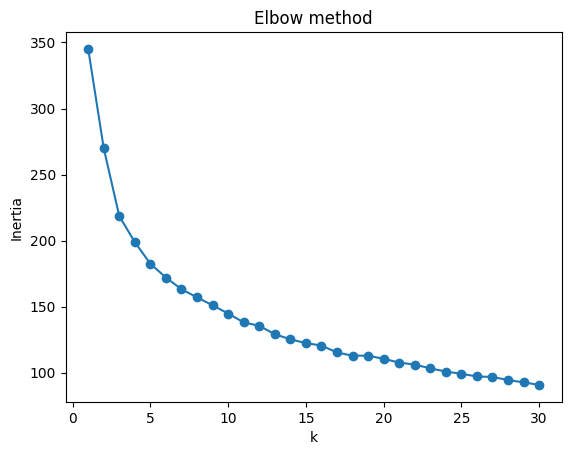

Suggested k = 3


In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

loop7 = all_loops[all_loops['loops'] == 7]
loop7 = loop7.dropna(axis = 1)
data_cols = [col for col in loop7.columns if 'EIGEN' in col]
X = loop7[data_cols]

inertias = []
for k in range(1, 31):
    inertias.append(KMeans(n_clusters=k, random_state=42, n_init=10)
                    .fit(X).inertia_)

plt.plot(range(1, 31), inertias, marker='o')
plt.xlabel("k"); plt.ylabel("Inertia"); plt.title("Elbow method"); plt.show()

second_deriv = np.diff(inertias, 2)
elbow_k = np.argmax(second_deriv) + 2
print("Suggested k =", elbow_k)

kmeans = KMeans(n_clusters=elbow_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)


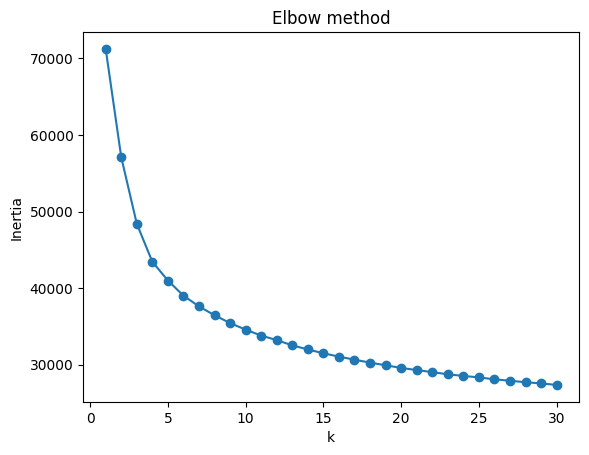

Suggested k = 2


In [161]:
loop7 = all_loops
loop7 = loop7.dropna(axis = 1)
data_cols = [col for col in loop7.columns if 'EIGEN' in col]
X = loop7[data_cols]

inertias = []
for k in range(1, 31):
    inertias.append(KMeans(n_clusters=k, random_state=42, n_init=10)
                    .fit(X).inertia_)

plt.plot(range(1, 31), inertias, marker='o')
plt.xlabel("k"); plt.ylabel("Inertia"); plt.title("Elbow method"); plt.show()

second_deriv = np.diff(inertias, 2)
elbow_k = np.argmax(second_deriv) + 2
print("Suggested k =", elbow_k)

kmeans = KMeans(n_clusters=elbow_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

In [162]:
# let's take 20

In [163]:
loop7 = all_loops
loop7 = loop7.dropna(axis = 1)
data_cols = [col for col in loop7.columns if 'EIGEN' in col]
X = loop7[data_cols]

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
labels = kmeans.fit_predict(X)

In [165]:
loop7['cluster'] = labels

/var/folders/4s/7f5zf8596_526pnhktn077f40000gn/T/ipykernel_40809/3338605754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop7['cluster'] = labels


In [171]:
all_loops['cluster'] = labels

In [174]:
"""
Cross-validated XGBoost on user-selected “loop” groups
-------------------------------------------------------

* train_loops … loops to *fit + CV-validate* on
* test_loops  … completely held-out loops to score on

Metrics
-------
• ROC-AUC           (threshold-free, both CV and external)
• “Confidence gap”  |prob − pred|   averaged per cluster
                    – highlights clusters with wrong or low-confidence
                      predictions without choosing a manual threshold

Outputs (per fold + summary)
----------------------------
• CV-AUC on train loops
• AUC on each test loop
• Cluster with largest mean gap (validation & test)
• Overall worst cluster across all folds
"""

from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

# ------------------------------------------------------------
# user settings
train_loops = [7, 8]     # loops that participate in CV training/validation
test_loops  = [9]        # loops evaluated only after the model is fitted
random_state = 42
n_splits = 5
# ------------------------------------------------------------

# ------------------  split data -----------------------------
train_data = all_loops[all_loops['loops'].isin(train_loops)].reset_index(drop=True)
test_data  = all_loops[all_loops['loops'].isin(test_loops )].reset_index(drop=True)

feature_cols = [c for c in all_loops.columns if 'EIGEN' in c]
target_col   = 'COEFFICIENT_DEN'

X_train_full   = train_data[feature_cols].values
y_train_full   = train_data[target_col].values.ravel()
cluster_train  = train_data['cluster'].values

X_test         = test_data[feature_cols].values
y_test         = test_data[target_col].values.ravel()
cluster_test   = test_data['cluster'].values
loop_test      = test_data['loops'].values

# ------------------  trackers -------------------------------
cv_aucs       = []
test_aucs_by_loop = {loop: [] for loop in test_loops}

# summed gap, count per cluster
gap_sum_val   = defaultdict(float)
cnt_val       = defaultdict(int)
gap_sum_test  = defaultdict(float)
cnt_test      = defaultdict(int)

# ------------------  CV loop -------------------------------
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

for fold, (tr_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full), 1):
    X_tr, X_val = X_train_full[tr_idx], X_train_full[val_idx]
    y_tr, y_val = y_train_full[tr_idx], y_train_full[val_idx]
    c_val       = cluster_train[val_idx]

    model = XGBClassifier(eval_metric='logloss',
                          random_state=random_state)
    model.fit(X_tr, y_tr)

    # ---- validation (train loops) --------------------------
    val_prob = model.predict_proba(X_val)[:, 1]
    val_pred = model.predict(X_val)
    fold_auc = roc_auc_score(y_val, val_prob)
    cv_aucs.append(fold_auc)
    print(f"\nFold {fold}  |  CV-AUC on loops {train_loops}: {fold_auc:.3f}")

    val_gap = np.abs(val_prob - val_pred)               # confidence gap
    for cl in np.unique(c_val):
        m = c_val == cl
        gap_sum_val[cl] += val_gap[m].sum()
        cnt_val[cl]     += m.sum()

    worst_val = max(gap_sum_val,
                    key=lambda k: gap_sum_val[k] / cnt_val[k])
    w_val_gap = gap_sum_val[worst_val] / cnt_val[worst_val]
    print(f"          worst-gap validation cluster → {worst_val} "
          f"(avg gap {w_val_gap:.3f})")

    # ---- external test loops -------------------------------
    test_prob = model.predict_proba(X_test)[:, 1]
    test_pred = model.predict(X_test)

    for lp in test_loops:
        m_loop = loop_test == lp
        if m_loop.any():
            auc = roc_auc_score(y_test[m_loop], test_prob[m_loop])
            test_aucs_by_loop[lp].append(auc)
            print(f"          AUC on loop {lp}: {auc:.3f}")
        else:
            print(f"          loop {lp}: no samples")

    test_gap = np.abs(test_prob - test_pred)
    for cl in np.unique(cluster_test):
        m = cluster_test == cl
        gap_sum_test[cl] += test_gap[m].sum()
        cnt_test[cl]     += m.sum()

    worst_test = max(gap_sum_test,
                     key=lambda k: gap_sum_test[k] / cnt_test[k])
    w_test_gap = gap_sum_test[worst_test] / cnt_test[worst_test]
    print(f"          worst-gap test cluster       → {worst_test} "
          f"(avg gap {w_test_gap:.3f})")

# ------------------  summary -------------------------------
print("\n=============  SUMMARY  =============")
print(f"Mean CV-AUC (loops {train_loops}): "
      f"{np.mean(cv_aucs):.3f} ± {np.std(cv_aucs):.3f}")

for lp in test_loops:
    auc_list = test_aucs_by_loop[lp]
    print(f"Mean AUC on loop {lp}: "
          f"{np.mean(auc_list):.3f} ± {np.std(auc_list):.3f}")

def report_worst(gap_sum, cnt, label):
    mean_gap = {c: gap_sum[c] / cnt[c] for c in gap_sum}
    worst = max(mean_gap, key=mean_gap.get)
    print(f"Worst {label} cluster overall → {worst} "
          f"(mean gap {mean_gap[worst]:.3f})")

report_worst(gap_sum_val,  cnt_val,  "validation")
report_worst(gap_sum_test, cnt_test, "test")



Fold 1  |  CV-AUC on loops [7, 8]: 0.947
          worst-gap validation cluster → 0 (avg gap 0.116)
          AUC on loop 9: 0.652
          worst-gap test cluster       → 10 (avg gap 0.229)

Fold 2  |  CV-AUC on loops [7, 8]: 0.953
          worst-gap validation cluster → 17 (avg gap 0.116)
          AUC on loop 9: 0.635
          worst-gap test cluster       → 10 (avg gap 0.213)

Fold 3  |  CV-AUC on loops [7, 8]: 0.937
          worst-gap validation cluster → 17 (avg gap 0.116)
          AUC on loop 9: 0.624
          worst-gap test cluster       → 17 (avg gap 0.230)

Fold 4  |  CV-AUC on loops [7, 8]: 0.940
          worst-gap validation cluster → 0 (avg gap 0.112)
          AUC on loop 9: 0.572
          worst-gap test cluster       → 17 (avg gap 0.212)

Fold 5  |  CV-AUC on loops [7, 8]: 0.933
          worst-gap validation cluster → 0 (avg gap 0.112)
          AUC on loop 9: 0.597
          worst-gap test cluster       → 17 (avg gap 0.215)

=============  SUMMARY  =============

In [23]:
#exploration - understanding relationship between denominators and numerators.
import pandas as pd

In [38]:
den_graph = pd.read_csv("/Users/rezadoobary/Documents/ML-correlator/Graph_Edge_Data/den_graph_data_9.csv")
full_graph = pd.read_csv("/Users/rezadoobary/Documents/ML-correlator/Graph_Edge_Data/graph_data_9.csv")
den_graph['DEN_EDGES'] = den_graph['EDGES']
del den_graph['EDGES']
den_graph.columns = ['den_coeffs','DEN_EDGES']
full_graph.columns = ['full_coeffs','DEN_EDGES','NUM_EDGES']
merged = den_graph.merge(full_graph, on = 'DEN_EDGES', how = 'left')

merged[merged['den_coeffs'] == 0]['full_coeffs'].value_counts()

full_coeffs
0    15665
Name: count, dtype: int64

In [39]:
# so if den coeffs is zero - then the full graph is automatically zero.

In [67]:
#!/usr/bin/env python3
"""
build_double_triangle_from_csv.py
---------------------------------
Create the double-triangle constraint system  A · c^(hi) = b^(lo)
when graphs are stored in CSVs that look like

    COEFFICIENTS,DEN_EDGES,NUM_EDGES
    1,"[(1,5),(1,6),...]","[(4,6),(7,9)]"
    …

The script:

1. Reads *high-loop* graphs (those you want coefficients for).
2. Reads *low-loop* graphs (pinch targets).
3. Optionally loads known low-loop coefficients.
4. Scans every double triangle, performs the pinch, checks planarity.
5. Writes   A.npz,  b.npy,  meta.json   into OUT_DIR.

Edit the three path constants below and just run:

    python build_double_triangle_from_csv.py
"""

# ----------- EDIT THESE PATHS ------------------------------------------------
HIGH_LOOP_CSV       = "/Users/rezadoobary/Documents/ML-correlator/Graph_Edge_Data/graph_data_8.csv"      # 8-loop graphs
LOW_LOOP_CSV        = "/Users/rezadoobary/Documents/ML-correlator/Graph_Edge_Data/graph_data_7.csv"      # 7-loop graphs
LOW_LOOP_COEFFS_JSON = None             # e.g. "coeffs_7.json" or None
OUT_DIR             = "/Users/rezadoobary/Documents/ML-correlator/Tree classifier for graphs/mixed_loops/build_from_csv_78"
# ----------------------------------------------------------------------------

import ast, json, os, itertools
import pandas as pd, networkx as nx, numpy as np
from scipy.sparse import coo_matrix, save_npz

def df_to_graph_list(csv_path):
    df = pd.read_csv(csv_path)
    graphs = []
    for idx, row in df.iterrows():
        den_edges = ast.literal_eval(row["DEN_EDGES"])
        #num_edges = ast.literal_eval(row["NUM_EDGES"])
        G = nx.Graph()
        G.add_edges_from(den_edges)
        #G.add_edges_from(num_edges)
        coeff = row.get("COEFFICIENTS", np.nan)
        graphs.append((f"row{idx}", G, coeff))
    return graphs

def wl_hash(G):
    return nx.weisfeiler_lehman_graph_hash(G)

def get_aut_size(G):
    """Return size of automorphism group using NetworkX's `bliss` backend."""
    return len(list(nx.algorithms.isomorphism.GraphMatcher(G, G).isomorphisms_iter()))

def find_double_triangles(G):
    for u, v in G.edges():
        common = set(G.neighbors(u)) & set(G.neighbors(v))
        if len(common) < 2:
            continue
        for a, b in itertools.combinations(common, 2):
            if all(G.has_edge(x, y) for x, y in [(u,a),(v,a),(u,b),(v,b)]):
                yield (u, v)

def pinch(G, u, v):
    H = G.copy()
    for nbr in list(H.neighbors(u)):
        if nbr != v:
            H.add_edge(v, nbr)
    H.remove_node(u)
    return H

def build_system(hi_graphs, lo_graphs, lo_coeffs):
    basis_lo = {wl_hash(G): (G, lo_coeffs.get(gid, 0.0)) for gid, G, _ in lo_graphs}
    rows, cols, data, b = [], [], [], []
    eq = 0
    id_to_col = {}

    for col, (gid_hi, G_hi, _) in enumerate(hi_graphs):
        id_to_col[gid_hi] = col
        aut_hi = get_aut_size(G_hi)

        for (u, v) in find_double_triangles(G_hi):
            G_pinch = pinch(G_hi, u, v)
            rhs = 0.0
            weight = 0.0

            if nx.check_planarity(G_pinch)[0]:
                hash_pinch = wl_hash(G_pinch)
                if hash_pinch in basis_lo:
                    G_lo, rhs = basis_lo[hash_pinch]
                    aut_lo = get_aut_size(G_lo)
                    weight = aut_lo / aut_hi

            rows.append(eq)
            cols.append(col)
            data.append(weight)
            b.append(rhs)
            eq += 1

    A = coo_matrix((data, (rows, cols)), shape=(eq, len(hi_graphs)), dtype=np.float64)
    return A, np.array(b), id_to_col

def main():
    hi_graphs = df_to_graph_list(HIGH_LOOP_CSV)
    lo_graphs = df_to_graph_list(LOW_LOOP_CSV)
    lo_coeffs = json.load(open(LOW_LOOP_COEFFS_JSON)) if LOW_LOOP_COEFFS_JSON else {}

    print(f"Loaded {len(hi_graphs)} high-loop and {len(lo_graphs)} low-loop graphs.")

    A, b, id2col = build_system(hi_graphs, lo_graphs, lo_coeffs)

    os.makedirs(OUT_DIR, exist_ok=True)
    save_npz(os.path.join(OUT_DIR, "A.npz"), A)
    np.save(os.path.join(OUT_DIR, "b.npy"), b)
    with open(os.path.join(OUT_DIR, "meta.json"), "w") as fh:
        json.dump({"id_to_col": id2col}, fh)

    print(f"Finished → A shape={A.shape}, nnz={A.nnz}")
    print(f"Files written to {OUT_DIR}/")

if __name__ == "__main__":
    main()


Loaded 2709 high-loop and 220 low-loop graphs.
Finished → A shape=(56075, 2709), nnz=56075
Files written to /Users/rezadoobary/Documents/ML-correlator/Tree classifier for graphs/mixed_loops/build_from_csv_78/


In [ ]:
from scipy.sparse import load_npz
import numpy as np

# Load constraint matrix and RHS
A = load_npz("/Users/rezadoobary/Documents/ML-correlator/Tree classifier for graphs/mixed_loops/build_from_csv_78/A.npz").tocsr()  # Shape (M, N)
b = np.load("/Users/rezadoobary/Documents/ML-correlator/Tree classifier for graphs/mixed_loops/build_from_csv_78/b.npy")           # Shape (M,)

# Precompute for fast Hessian approximation
A_sqsum = np.asarray(A.power(2).sum(axis=0)).ravel()  # shape (N,)
lambda_rule = 10.0  # Strength of the constraint (tune this)

M_inv = 1.0 / A.shape[0]


In [75]:
"""
train_with_double_triangle.py
-----------------------------
• Binary classification (XGBClassifier, sklearn API)
• Double-triangle rule enforced via a per-fold custom objective
• 5-fold stratified CV, ROC-AUC on validation and held-out loops
"""

import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.sparse import load_npz
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# ---------------------------------------------------------------------------
# 1.  LOAD YOUR DATA  --------------------------------------------------------
# ---------------------------------------------------------------------------
# (Replace this with your real CSV / pickle load)
loop7_data = pd.read_csv(Path("/Users/rezadoobary/Documents/ML-correlator/Tree classifier for graphs/7-loops /fgraph_eigen_7.csv"))
loop8_data = pd.read_csv(Path("/Users/rezadoobary/Documents/ML-correlator/Tree classifier for graphs/8-loops/fgraph_eigen_8.csv"))
loop9_data = pd.read_csv(Path("/Users/rezadoobary/Documents/ML-correlator/Tree classifier for graphs/9-loops/fgraph_eigen_9.csv"))
loop7_data["loops"] = 7
loop8_data["loops"] = 8
loop9_data["loops"] = 9
all_loops = pd.concat([loop7_data, loop8_data, loop9_data], axis=0, ignore_index=True)

# Features, label, train/test-loop split
DATA_COLS   = [c for c in all_loops.columns if "EIGEN" in c]     # your eigenvectors
TARGET_COL  = "COEFFICIENT_DEN"                                  # 0/1 coefficient sign
TRAIN_LOOPS = [7]                                                # loops to train on
TEST_LOOPS  = [8]                                                # loops to test on

train_df = all_loops[all_loops["loops"].isin(TRAIN_LOOPS)].reset_index(drop=True)
test_df  = all_loops[all_loops["loops"].isin(TEST_LOOPS)].reset_index(drop=True)

X_train_full = train_df[DATA_COLS].values.astype(np.float32)
y_train_full = train_df[TARGET_COL].values.ravel().astype(np.int32)

X_test = test_df[DATA_COLS].values.astype(np.float32)
y_test = test_df[TARGET_COL].values.ravel().astype(np.int32)
loop_test = test_df["loops"].values

# ---------------------------------------------------------------------------
# 2.  LOAD THE GLOBAL DOUBLE-TRIANGLE SYSTEM  -------------------------------
# ---------------------------------------------------------------------------
# Load constraint matrix and RHS
A_global = load_npz("/Users/rezadoobary/Documents/ML-correlator/Tree classifier for graphs/mixed_loops/build_from_csv_78/A.npz").tocsr()  # Shape (M, N)
b_global = np.load("/Users/rezadoobary/Documents/ML-correlator/Tree classifier for graphs/mixed_loops/build_from_csv_78/b.npy")           # Shape (M,)

# Precompute for fast Hessian approximation
A_sqsum = np.asarray(A.power(2).sum(axis=0)).ravel()  # shape (N,)
λ_RULE    = 10.0  # Strength of the constraint (tune this)

M_INV = 1.0 / A.shape[0]

# ---------------------------------------------------------------------------
# 3.  STRATIFIED 5-FOLD CV WITH FOLD-SPECIFIC LOSS ---------------------------
# ---------------------------------------------------------------------------

def make_fold_loss(A_sub, b_sub, λ, A_sqsum_sub):
    """
    Returns a custom objective f(labels, preds) matching sklearn-API signature.
    A_sub  : sparse (M, N_fold)   – only the columns used in this fold
    b_sub  : dense  (M,)
    A_sqsum_sub : diag of A_sub.T @ A_sub   (N_fold,)
    """
    def _loss(labels, preds):
        # --- logistic base part ---
        preds_clipped = np.clip(preds, -10, 10)        # numerical safety
        probs  = 1.0 / (1.0 + np.exp(-preds_clipped))
        grad_sup = probs - labels
        hess_sup = probs * (1.0 - probs)

        # --- rule penalty ---
        residual  = A_sub @ preds - b_sub
        grad_rule = (2 * lambda_rule * M_INV) * (A_sub.T @ residual)
        hess_rule = (2 * lambda_rule * M_INV) * A_sqsum_sub

        return grad_sup + grad_rule, hess_sup + hess_rule
    return _loss


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

val_aucs   = []
test_aucs  = {loop: [] for loop in TEST_LOOPS}

for fold, (idx_train, idx_val) in enumerate(kf.split(X_train_full, y_train_full), 1):
    X_tr, y_tr = X_train_full[idx_train], y_train_full[idx_train]
    X_va, y_va = X_train_full[idx_val],   y_train_full[idx_val]

    # --- slice constraint matrix to the *training-fold* rows (columns) ----
    A_sub       = A_global[:, idx_train]                   # (M, N_tr)
    A_sqsum_sub = np.asarray(A_sub.power(2).sum(axis=0)).ravel()

    fold_loss = make_fold_loss(A_sub, b_global, λ_RULE, A_sqsum_sub)

    # --- model ------------------------------------------------------------
    clf = XGBClassifier(
        objective=fold_loss,          # callable loss
        eval_metric="logloss"
    )

    clf.fit(X_tr, y_tr, eval_set=[(X_va, y_va)], verbose=False)

    # --- CV validation AUC -----------------------------------------------
    val_pred = clf.predict_proba(X_va)[:, 1]
    val_auc  = roc_auc_score(y_va, val_pred)
    val_aucs.append(val_auc)
    print(f"Fold {fold}:  validation AUC = {val_auc:.4f}")

    # --- External test AUC per loop --------------------------------------
    test_pred = clf.predict_proba(X_test)[:, 1]
    for loop_id in TEST_LOOPS:
        mask = loop_test == loop_id
        if mask.any():
            auc = roc_auc_score(y_test[mask], test_pred[mask])
            test_aucs[loop_id].append(auc)
            print(f"        loop {loop_id} AUC = {auc:.4f}")

# ---------------------------------------------------------------------------
# 4.  SUMMARY  ---------------------------------------------------------------
# ---------------------------------------------------------------------------
print("\n==== Cross-validated results ====")
print(f"Mean val AUC (loops={TRAIN_LOOPS}): {np.mean(val_aucs):.4f} ± {np.std(val_aucs):.4f}")
for loop_id in TEST_LOOPS:
    arr = np.asarray(test_aucs[loop_id])
    print(f"Mean test AUC on loop {loop_id}: {arr.mean():.4f} ± {arr.std():.4f}")


Fold 1:  validation AUC = 0.8419
        loop 8 AUC = 0.6273
Fold 2:  validation AUC = 0.9573
        loop 8 AUC = 0.6374
Fold 3:  validation AUC = 0.9116
        loop 8 AUC = 0.6733
Fold 4:  validation AUC = 0.7958
        loop 8 AUC = 0.6541
Fold 5:  validation AUC = 0.8400
        loop 8 AUC = 0.6397

==== Cross-validated results ====
Mean val AUC (loops=[7]): 0.8693 ± 0.0575
Mean test AUC on loop 8: 0.6464 ± 0.0160


Fold 1 AUC (train folds on loops [7]): 0.868
Fold 1 AUC (loop 8): 0.642
Fold 2 AUC (train folds on loops [7]): 0.955
Fold 2 AUC (loop 8): 0.675
Fold 3 AUC (train folds on loops [7]): 0.895
Fold 3 AUC (loop 8): 0.685
Fold 4 AUC (train folds on loops [7]): 0.815
Fold 4 AUC (loop 8): 0.688
Fold 5 AUC (train folds on loops [7]): 0.842
Fold 5 AUC (loop 8): 0.665

Average ROC AUC on training fold (loops [7]): 0.875 ± 0.048
Average ROC AUC on loop 8: 0.671 ± 0.017


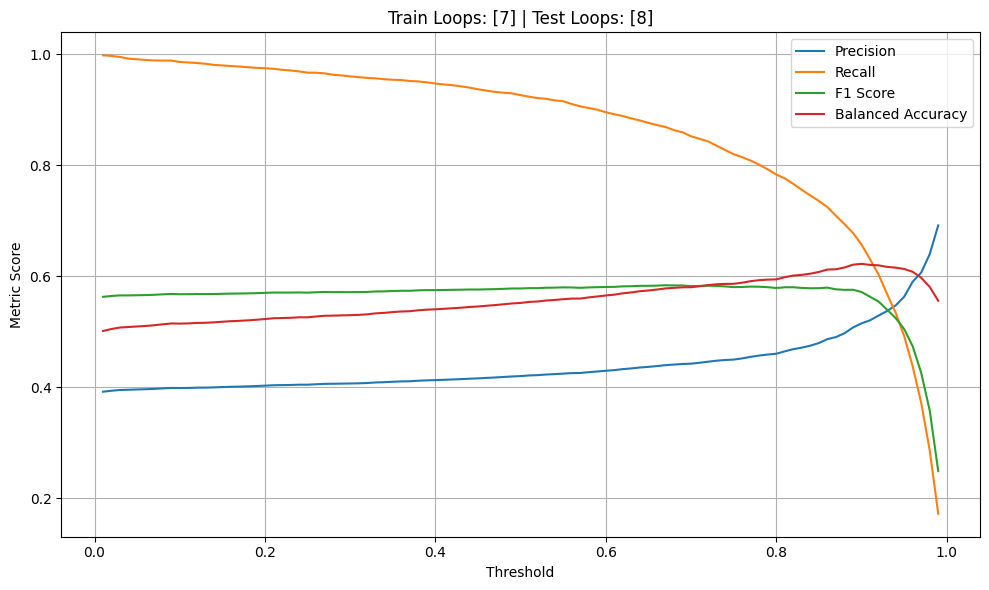

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- Define loops to use ---
train_loops = [7]
test_loops = [8]

# --- Split data ---
train_data = all_loops[all_loops['loops'].isin(train_loops)]
test_data = all_loops[all_loops['loops'].isin(test_loops)]

# --- Columns ---
data_cols = [col for col in all_loops.columns if 'EIGEN' in col]
target_col = 'COEFFICIENT_DEN'

# --- Train data ---
X_train_full = train_data[data_cols].values
y_train_full = train_data[target_col].values.ravel()

# --- Test data ---
X_test = test_data[data_cols].values
y_test = test_data[target_col].values.ravel()
loop_test = test_data['loops'].values

# --- Thresholds for metric curves ---
thresholds = np.linspace(0.01, 0.99, 99)
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1s = np.zeros_like(thresholds)
balanced_accuracies = np.zeros_like(thresholds)

# --- AUC trackers ---
train_val_aucs = []  # loop(s) used for training cross-val
test_loop_aucs = {loop: [] for loop in test_loops}  # aucs for each test loop

# --- Stratified K-Fold CV ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full)):
    X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
    y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)

    # --- AUC on validation set (from train loop group) ---
    val_scores = model.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, val_scores)
    train_val_aucs.append(val_auc)
    print(f"Fold {fold+1} AUC (train folds on loops {train_loops}): {val_auc:.3f}")

    # --- AUC on each test loop
    test_scores = model.predict_proba(X_test)[:, 1]
    for loop_id in test_loops:
        mask = loop_test == loop_id
        if mask.sum() > 0:
            auc = roc_auc_score(y_test[mask], test_scores[mask])
            test_loop_aucs[loop_id].append(auc)
            print(f"Fold {fold+1} AUC (loop {loop_id}): {auc:.3f}")
        else:
            print(f"Fold {fold+1} has no samples for loop {loop_id}")

    # --- Threshold metrics (on all test loops combined) ---
    for i, t in enumerate(thresholds):
        y_pred = (test_scores >= t).astype(int)
        precisions[i] += precision_score(y_test, y_pred, zero_division=0)
        recalls[i] += recall_score(y_test, y_pred)
        f1s[i] += f1_score(y_test, y_pred)
        balanced_accuracies[i] += balanced_accuracy_score(y_test, y_pred)

# --- Average metrics ---
n_folds = kf.get_n_splits()
precisions /= n_folds
recalls /= n_folds
f1s /= n_folds
balanced_accuracies /= n_folds

# --- Print AUC summaries ---
print(f"\nAverage ROC AUC on training fold (loops {train_loops}): {np.mean(train_val_aucs):.3f} ± {np.std(train_val_aucs):.3f}")
for loop_id in test_loops:
    aucs = test_loop_aucs[loop_id]
    print(f"Average ROC AUC on loop {loop_id}: {np.mean(aucs):.3f} ± {np.std(aucs):.3f}")

# --- Plot metrics vs threshold ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score")
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.title(f"Train Loops: {train_loops} | Test Loops: {test_loops}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
